# Persiapan Environment
## Import Library

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import string
import spacy
from sklearn import metrics
from sklearn.cluster import AffinityPropagation

from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Pengambilan Data

Data diambil melalui database SQLite3 Tweets.db yang ada pada direktori. Data diambil dengan membuat koneksi ke database dan kemudian hanya mengambil kolom tweet saja dan mengubahnya menjadi dataframe.

In [2]:
try:
  sqliteConnection = sqlite3.connect('../Tweets.db')
  df = pd.read_sql('SELECT tweet FROM tweet', sqliteConnection)

except sqlite3.Error as error:
  print("Error while connecting to sqlite", error)
finally:
  if sqliteConnection:
    sqliteConnection.close()
    print("The SQLite connection is closed")

The SQLite connection is closed


# Preprocessing
## Persiapan Preprocessing
Didefinisikan terlebih dahulu punctuation, bahasa yang digunakan, stop words, serta parser.

In [3]:
#Create our list of punctuation marks
punctuations = string.punctuation

#Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = STOP_WORDS
stop_words.add('amp')
stop_words.add('rt')


Selanjutnya fungsi berikut berfungsi untuk mengolah data berupa dokumen cuitan menjadi token, yaitu kata-kata dasar yang memiliki kemungkinan relevan dalam pengolahan data nantinya dalam suatu dokumen. Hal ini dilakukan karena pada text mining, dokumen yang digunakan harus disimplifikasi terlebih dahulu agar nantinya model tidak menerima terlalu banyak data noise yang dapat mengurangi ketepatan model.


In [4]:
def spacy_tokenizer(sentence):
  #Creating our token object, which is used to create documents with linguistic annotations.
  mytokens = nlp(sentence)

  #Lemmatizing each token and converting each token into lowercase
  mytokens = [word.lemma_.lower().strip() if word.lemma_ != '-PRON-' else
              word.lower_ for word in mytokens]
  #Removing stop words
  mytokens = [word for word in mytokens if word not in stop_words and word
              not in punctuations]
  #Return preprocessed list of tokens
  return mytokens

## Pengambilan Data Cuitan
Dibawah ini dataframe yang berisi tweetnya diubah menjadi numpy array dan disimpan di dalam res_list

In [5]:
res_list = df['tweet'].to_numpy()
res_list

array(['rt furrincrypto samsung galaxy jt gcash rt amp follow banksyfarm bonus join telegram proof http',
       'rt aniyoogifteu giveaway idr php samsung galaxy for winner follow resaalfny aisarcrypt',
       'rt cryptogeum jt samsung galaxy in hours rt amp follow alexapromoter mindofkarma flispide cry',
       'rt samsung galaxy rt follow richquack rt like comment something good about richquack on their',
       'rt kooknish samsung giving free mobile on holiday',
       'not this girl getting sad because i m getting a samsung phone again lol we have snapchat and whatsapp for vid c',
       'rt cryptogeum jt samsung galaxy in hours rt amp follow alexapromoter mindofkarma flispide cry',
       'ofertasdeldia ofertaschile qled samsung smart tv uhd con todo medio de pago',
       'rt furrincrypto samsung galaxy jt gcash rt amp follow banksyfarm bonus join telegram proof http',
       'rt cryptogeum jt samsung galaxy in hours rt amp follow hiravencrypto n',
       'rt samsung galaxy rt f

## TF IDF Vectorizer
Data cuitan lalu dimasukkan ke TF IDF Vectorizer agar dapat dimasukkan ke model nantinya. Vectorizer ini memanfaatkan fungsi spacy_tokenizer tadi dan ngram_range berupa 1,1 yang berarti tiap kata dalam cuitan divektorisasi satu per satu. 

In [6]:
# vectorizer = HashingVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1), n_features = 2**20)
vectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
vectors = vectorizer.fit_transform(res_list)

# Word Cloud
Pertama dilakukan pembersihan data dengan memanfaatkan fungsi spacy_tokenizer terhadap data cuitan saja

In [7]:
cleaned_tweets = [spacy_tokenizer(data) for data in df['tweet'].to_numpy()]
# cleaned_tweets

Di bawah ini merupakan kode konfigurasi visualisasi teks dengan menggunakan word cloud, dimana semakin sering suatu kata muncul, semakin besar pula ukurannya.

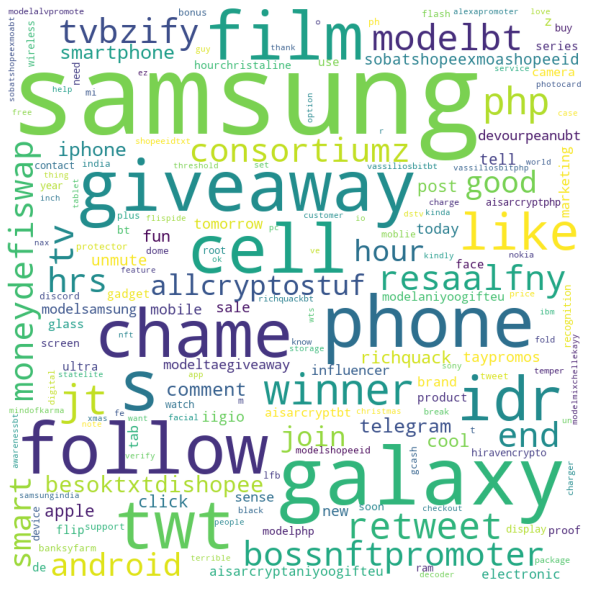

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ''
for val in cleaned_tweets:
    words += " ".join(val)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                collocations = False,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Model Affinity Propagation
## Hasil Affinity Propagation
Di bawah merupakan label Affinity Propagation yang telah terbentuk, berjumlah sesuai dengan data dokumen cuitan

In [9]:
clustering = AffinityPropagation(max_iter=1000, damping=0.8, verbose=True).fit(vectors)
clustering.labels_

Converged after 234 iterations.


array([ 13, 188,   0,   4,  70,  85,   0, 229,  13,   3,   4,   3,   2,
         1, 128, 138,   1,  13,  12,   1,   4, 130,  34,   0,   3,   3,
        57, 199,  70,   2, 155, 108,   3,   3,   4,  12,   0,   3, 146,
         5,   6,   9,  99,   6,   9,   9, 159, 146, 128, 199,   9,   9,
       197, 180,   7, 146,   8, 242,  55,  13, 128, 180,   9,   5,   9,
         7, 242,   9,   9,   8, 207,   9,  10,   9,   5,   9,   5,   6,
       113,   9,  15,  11,  11, 138,  12, 247,  15, 180,  20,  13,  72,
        14,  15,  15,  15,  16,  13,  17,  15,  18, 104,  19, 104,  20,
        21,  22, 191,  23,  12,  55, 104,  55, 162,  24,  25,  20,  26,
       102,  27,  28,  29,  30, 188,  31,  32,  33,  34,  35,  36,  95,
        37,  34, 104,  35,  38,  87, 199,  39,  40, 188,  41,  34,  42,
        20,  27,  20,  43,  85, 207,  44,  45,  87,  46,  47,  48, 159,
        99,  49,  50,  51,  52,  70,  20,  87,  53, 204,  54,  55,  94,
        56,  57,  58,  59,  60,  76,  97,  61,  16,  62,  63,  6

## Silhouette Coefficient
Kami mengukur model kami menggunakan Silhouette Coefficient dengan memanfaatkan metriks cosine. Semakin tinggi nilai Silhouette Coefficient, maka semakin bagus modelnya. Melalui berbagai percobaan kami, ditemukan bahwa percobaan dengan waktu Stream yang lebih lama menghasilkan Silhouette Coefficient lebih tinggi atau model yang lebih bagus karena data yang didapat lebih banyak sehingga model dapat memprediksi klaster dengan lebih baik.

In [10]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(vectors, clustering.labels_, metric='cosine'))

Silhouette Coefficient: 0.439
